# Houses in Seattle: what the people want?
### An exploratory analysis on the real estate market in Seattle.

## The path of the exploration

There are few important questions we want to ask about the prices of the houses sold in the area of Seattle.
1. Is there a relationship between **time** and **prices**?
2. What about the features of the house. What properties make an house more expensive? The number of **bedrooms** or **bathrooms**? Having a **view**? What about the **neighborhood**?

## Let's start with the data.
### The data and the tools we need

The data is a collection of houses sold in the state of Washington, containing all kind of description and their price. I would like to get some insights on what influences the price of the houses.

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sales = pd.read_csv('sales.csv', index_col=0)

In [10]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13 00:00:00+00:00,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.511234,-122.256775,1340.0,5650.0
1,6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721023,-122.318862,1690.0,7639.0
2,5631500400,2015-02-25 00:00:00+00:00,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.737927,-122.233196,2720.0,8062.0
3,2487200875,2014-12-09 00:00:00+00:00,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.520820,-122.393185,1360.0,5000.0
4,1954400510,2015-02-18 00:00:00+00:00,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.616812,-122.044901,1800.0,7503.0


In the column *date* we have the date in which that particular house was sold. We have data from **May 2014** to **May 2015**.

In [15]:
print "The oldest observation:",sales[['date']].min()
print "The earliest observation:",sales[['date']].max()

The oldest observation: date    2014-05-02 00:00:00+00:00
dtype: object
The earliest observation: date    2015-05-27 00:00:00+00:00
dtype: object


### Some new columns

It makes sense to manipulate the data in such a way that:
1. We highlight the Year and the Month of the sale rather than the exact date;
2. We know the *price per sqft*

In [16]:
sales['date'] = pd.to_datetime(sales['date'])
sales['year_month'] = sales['date'].apply(lambda x: x.strftime('%Y-%m'))     
sales['price_per_sqft'] = sales['price'].apply(float)/sales['sqft_living'].apply(float)

## Sales and time

The first question we may ask is:
**is there a relationship between sales and time?**. More specifically is there a time trend for the average price per sqft? What about the amount of houses sold each month: is there a seasonality? Or a trend about the market?

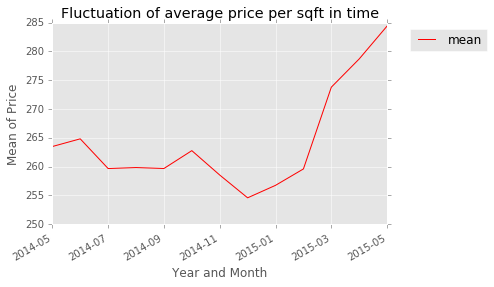

In [28]:
grouped_sales = sales[['year_month','price_per_sqft', 'sqft_living', 'bedrooms']].groupby('year_month')
mean_sales = grouped_sales.agg(['mean'])
mean_sales['price_per_sqft'].plot(kind='line', color='red', label='price mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.gcf().autofmt_xdate()
plt.xlabel("Year and Month")
plt.ylabel("Mean of Price")
plt.title("Fluctuation of average price per sqft in time")
plt.show()

There is an increasing trend. It would be interesting to retrieve older or newer data and plot the same curve, to see how the market is evolving.

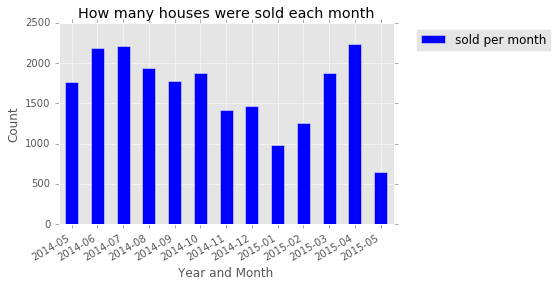

In [29]:
grouped_sales = sales[['year_month','price', 'sqft_living', 'bedrooms']].groupby('year_month')
grouped_sales.size().plot(kind='bar', color='blue', label='sold per month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.gcf().autofmt_xdate()
plt.xlabel("Year and Month")
plt.ylabel("Count")
plt.title("How many houses were sold each month")
plt.show()

There could be a *seasonality*, but we would need more data to have an hypothesis testing.

## Features and Price

Let's explore how the actual features of an house influence the sale price.

### Bathrooms, Bedrooms and Beyond.

Here we plot how the houses are disrtibuted according to their features.

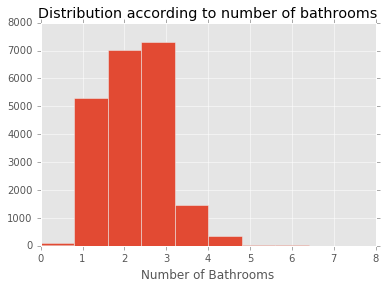

In [26]:
plt.hist(np.array(sales[['bathrooms']]))
plt.xlabel("Number of Bathrooms")
plt.title("Distribution according to number of bathrooms")
plt.show()

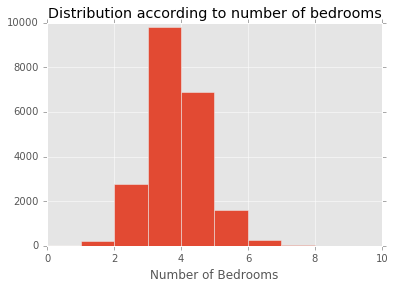

In [27]:
plt.hist(np.array(sales[['bedrooms']]), bins=[0, 1, 2, 3, 4, 5, 6,7,8,9,10])
plt.xlabel("Number of Bedrooms")
plt.title("Distribution according to number of bedrooms")
plt.show()

### Year built against price per sqft

Let us see how the year of a construction influences the price of an house. **Newer is always better?**

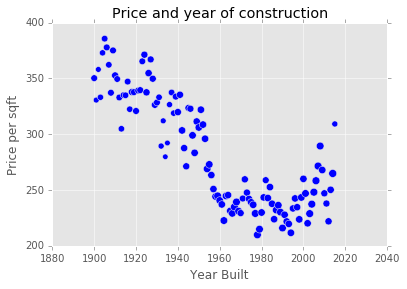

In [31]:
sales_built = sales[sales['yr_built']!=0]
built = sales_built.groupby('yr_built')
x = np.array(built.agg('mean')['price_per_sqft'])
y = np.array(built.agg('mean')['price_per_sqft'].index)
z = np.array(built.size())
plt.scatter(y,x, s = 10*np.log(z))
plt.xlabel("Year Built")
plt.ylabel("Price per sqft")
plt.title("Price and year of construction")
plt.show()

It does actually seem that newew is not at all better!!! 
1. Indeed the ancient houses have an higher price.
2. The houses built between 1960 and 2000 have the lowest average price per sqft
3. The houses built in the last 20 years tend to have an higher price, but anyway low compared to the *ancient* buildings.

### Price compared to number of bathrooms/bedrooms/sqft

How does the price compare with the number of bathrooms and bedrooms? Again is more better?

In [35]:
sales['bathrooms_range'] = sales['bathrooms']*0
sales.loc[sales.bathrooms < 0.75, 'bathrooms_range'] = 0
max_bath = int(np.ceil(sales['bathrooms'].max()))
for number in range(1, max_bath):
    sales.loc[sales['bathrooms'].isin(np.arange(number-0.25, number+0.75, 0.25)), \
              'bathrooms_range'] = number

In [36]:
bathrooms = sales.groupby('bathrooms_range')
bedrooms = sales.groupby('bedrooms')

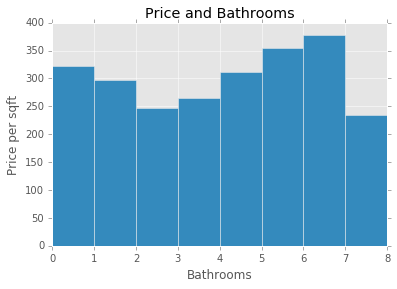

In [63]:
x = np.array(bathrooms.agg('mean')['price_per_sqft'])
y = np.array(bathrooms.agg('mean')['price_per_sqft'].index)
plt.bar(y,x, width = 1)
plt.xlabel("Bathrooms")
plt.ylabel("Price per sqft")
plt.title("Price and Bathrooms")
plt.show()

It does not seem that **more bathrooms correspond to higher price**!

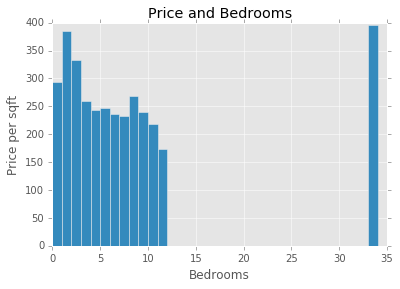

In [62]:
x = np.array(bedrooms.agg('mean')['price_per_sqft'])
y = np.array(bedrooms.agg('mean')['price_per_sqft'].index)
plt.bar(y,x, width = 1)
plt.xlabel("Bedrooms")
plt.ylabel("Price per sqft")
plt.title("Price and Bedrooms")
plt.show()

In the case of bedrooms, it does seem that less bedrooms is actually better!

### What is the most popular size?

Let's see how the dimension of the house influences the price. 

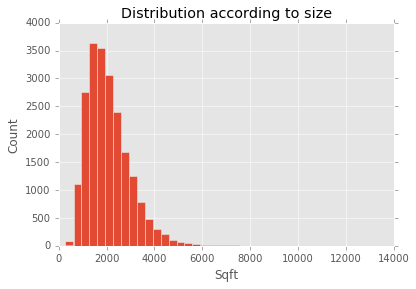

In [104]:
plt.hist(sales.sqft_living, bins=40)
plt.title("Distribution according to size")
plt.xlabel("Sqft")
plt.ylabel('Count')
plt.show()

In [57]:
bins = 5.
quantiles = np.append(np.arange(0,100, 100./bins), float(100))
a = np.array(sales.sqft_living)
sales['sqft_living_range'] = sales['sqft_living']*0
sales.loc[sales.sqft_living < np.percentile(a, quantiles[1]), 'sqft_living_range'] = \
np.percentile(a, quantiles[0])

sales.loc[sales.sqft_living > np.percentile(a, quantiles[len(quantiles)-1]), 'sqft_living_range'] = \
np.percentile(a, quantiles[len(quantiles)-1])

for i in range(0,len(quantiles)-1):
    sales.loc[sales['sqft_living'].isin(np.arange(np.percentile(a, quantiles[i]), \
                                                  np.percentile(a, quantiles[i+1]),1)),\
            'sqft_living_range'] = np.percentile(a, quantiles[i])

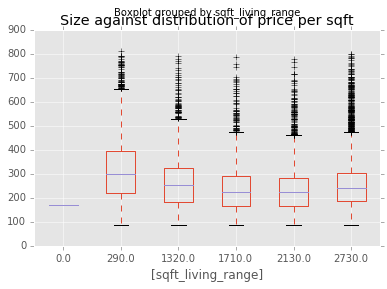

In [61]:
df = sales[['sqft_living_range', 'price_per_sqft']]
df.boxplot(by = 'sqft_living_range')
plt.title("Size against distribution of price per sqft")
plt.show()

The smaller houses have an higher price per sqft.

## Plus features. 
### View, Waterfront and ZIPCODE: do they really matter?

In [37]:
w = sales['price_per_sqft'][sales.waterfront == 0].mean()
n_w =sales['price_per_sqft'][sales.waterfront == 1].mean()

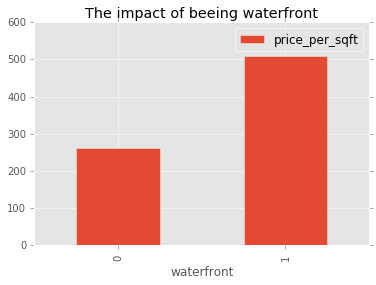

In [66]:
grouped_waterfront = sales[['price_per_sqft', 'waterfront']].groupby('waterfront')
grouped_waterfront.agg('mean').plot(kind='bar')
plt.title("The impact of beeing waterfront")
plt.show()

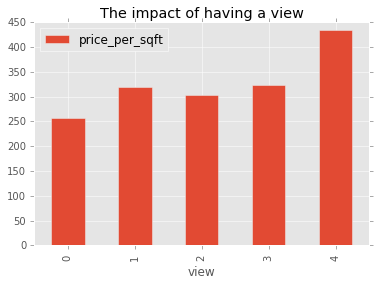

In [67]:
grouped_view = sales[['price_per_sqft', 'view']].groupby('view')
grouped_view.agg('mean').plot(kind='bar')
plt.title("The impact of having a view")
plt.show()

In [68]:
grouped_view = sales[['price_per_sqft', 'zipcode']].groupby('zipcode')
sorted_zips = grouped_view.agg('mean')['price_per_sqft'].sort_values()

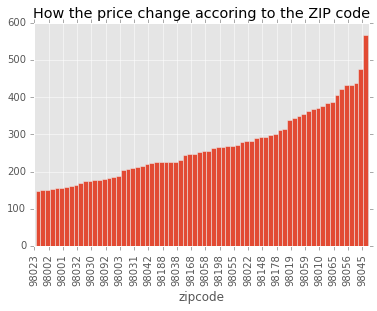

In [103]:
fig, ax = plt.subplots()
sorted_zips.plot(kind='bar', width = 1)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3))
plt.title('How the price change accoring to the ZIP code')
plt.show()

## Conclusions and further insights

* It would be interesting to investigate the relationship with time a bit further, by retrieving more data and by checking if there is actually **year seasonality** in the sales. Also, more investigation on the market could be done: are the prices raising or not?

* The features do influence the price per sqft, but not in the most obvius way. More bathrooms or bedrooms do not necessarely imply an higher price. The reason can be found in the fatc that there is more demand for smaller houses/apartments!

* View, waterfront and Zip Code do influence the prices!